## **Retail Customer Classification Problem**

# **Importing Libraries**

In [ ]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
sns.set()

In [ ]:
#Load the two datasets as given and store it as train data nad val data
train = pd.read_csv('/content/Data Science HW design model.csv')
val = pd.read_csv('/content/Data Science HW design val.csv')

# **Exploratory Data Analysis**

In [ ]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A1       11500 non-null  float64
 1   A2       11500 non-null  float64
 2   A3       11500 non-null  float64
 3   A4       11500 non-null  float64
 4   A5       11500 non-null  float64
 5   A6       11500 non-null  float64
 6   A7       11500 non-null  float64
 7   A8       11500 non-null  float64
 8   A9       11500 non-null  float64
 9   A10      11500 non-null  float64
 10  A11      11500 non-null  float64
 11  A12      11500 non-null  float64
 12  A13      11500 non-null  float64
 13  A14      11500 non-null  float64
 14  A15      11500 non-null  float64
 15  A16      11500 non-null  float64
 16  A17      11500 non-null  float64
 17  A18      11500 non-null  float64
 18  A19      11500 non-null  float64
 19  A20      11500 non-null  float64
 20  A21      11500 non-null  int64  
 21  A22      115

In [ ]:
#Checking for non-null value count
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94000 entries, 0 to 93999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A1       94000 non-null  float64
 1   A2       94000 non-null  float64
 2   A3       94000 non-null  float64
 3   A4       94000 non-null  float64
 4   A5       94000 non-null  float64
 5   A6       94000 non-null  float64
 6   A7       94000 non-null  float64
 7   A8       94000 non-null  float64
 8   A9       94000 non-null  float64
 9   A10      94000 non-null  float64
 10  A11      94000 non-null  float64
 11  A12      94000 non-null  float64
 12  A13      94000 non-null  float64
 13  A14      94000 non-null  float64
 14  A15      94000 non-null  float64
 15  A16      94000 non-null  float64
 16  A17      94000 non-null  float64
 17  A18      94000 non-null  float64
 18  A19      94000 non-null  float64
 19  A20      94000 non-null  float64
 20  A21      94000 non-null  int64  
 21  A22      940

In [ ]:
'''Checking the training data to compare the different data points in the set. 
It, holisticly gives a debrief on different data values'''
train.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
count,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,9.400000e+04,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000
mean,12.134211,83.838361,7319.620881,13449.501569,33.507640,36.983300,1.518232,124.108845,1.697824,1.407075,82.561804,11.364377,20.453328,55.172549,1.036205e+05,0.282347,4113.993992,0.190747,0.112162,1.545606,53.707096,0.074435,0.008550,0.013537,0.133531,290.756534,357.976444,103.482568,28.847016,38.509910,0.042553
std,6.587858,8.672843,2652.539364,8197.452662,11.906865,14.209314,1.007398,33.130292,0.776810,0.652138,10.740732,2.767727,11.671429,12.015331,5.954836e+04,0.252047,1300.549863,0.181137,0.142458,0.627285,56.617973,0.138356,0.020052,0.029078,0.156658,471.958770,597.594147,136.248095,62.759062,90.882963,0.201849
min,0.000000,20.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.460000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.010000,-0.020000,-0.020000,0.000000,-751.260000,-405.370000,-616.230000,-490.160000,-719.720000,0.000000
25%,7.670000,79.000000,5618.627500,8700.000000,26.880000,28.780000,0.820000,103.027500,1.272000,1.000000,77.270000,9.640000,13.600000,49.070000,6.562992e+04,0.130000,3422.220000,0.080000,0.000000,1.140000,19.000000,0.010000,0.000000,0.000000,0.060000,0.000000,0.000000,14.970000,0.000000,0.000000,0.000000
50%,12.020000,84.360000,7285.590000,11862.650000,32.770000,35.940000,1.420000,127.240000,1.667000,1.399000,83.340000,11.330000,19.110000,55.190000,9.074253e+04,0.250000,4050.000000,0.170000,0.090000,1.450000,39.000000,0.030000,0.000000,0.010000,0.090000,115.140000,102.265000,59.350000,10.500000,0.000000,0.000000
75%,16.080000,89.670000,8780.870000,15896.575000,39.100000,43.830000,2.020000,143.100000,2.064000,1.714000,89.010000,12.790000,25.170000,61.810000,1.282739e+05,0.360000,4668.192500,0.250000,0.140000,1.860000,69.000000,0.080000,0.010000,0.010000,0.140000,380.142500,485.880000,140.952500,34.860000,49.862500,0.000000
max,62.710000,100.000000,26333.500000,170300.000000,146.000000,146.000000,18.670000,524.000000,44.000000,44.000000,100.000000,35.430000,237.000000,146.000000,1.079286e+06,7.000000,20000.000000,3.250000,5.000000,8.100000,1902.000000,5.300000,0.700000,1.690000,4.080000,15288.660000,19503.760000,3265.980000,6561.930000,13487.000000,1.000000


In [ ]:
#To check the variation in data given
train.nunique(axis=0)

A1          3381
A2          4541
A3         73162
A4         59682
A5          6144
A6          6777
A7           755
A8         14728
A9          2647
A10         2124
A11         4955
A12         2035
A13         4946
A14         6608
A15        79651
A16          242
A17        46499
A18          172
A19          165
A20          504
A21          587
A22          213
A23           48
A24           66
A25          180
A26        45351
A27        45396
A28        29538
A29        14293
A30        18430
default        2
dtype: int64

In [ ]:
#Find discrete features
dataset = train.copy()
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<50 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [ ]:
print('The discrete features presennt in the dataset is:', discrete_feature)

The discrete features presennt in the dataset is: ['A23', 'default']


In [ ]:
#Find continous features
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 29


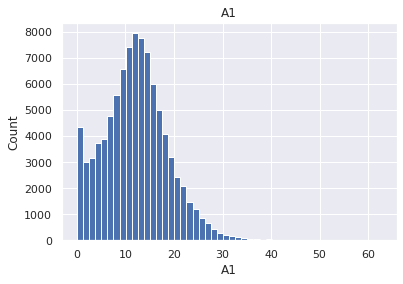

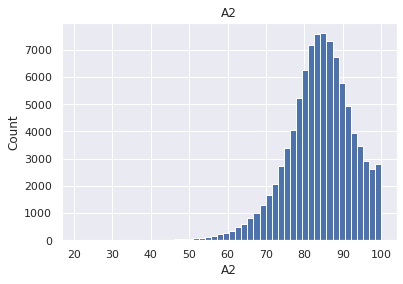

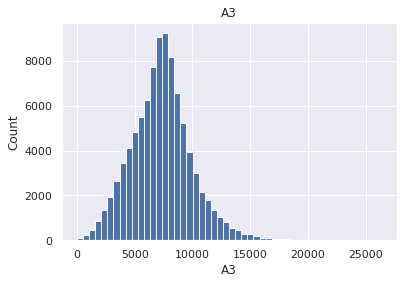

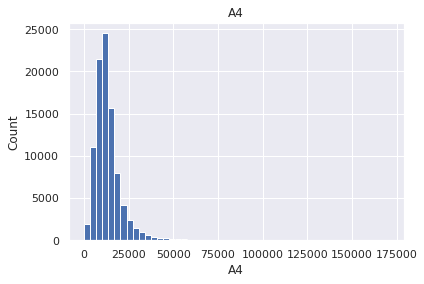

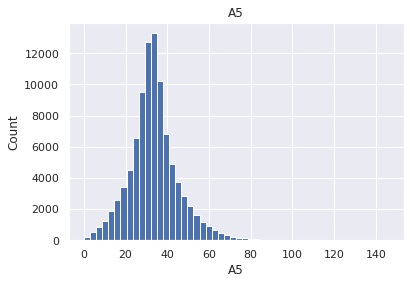

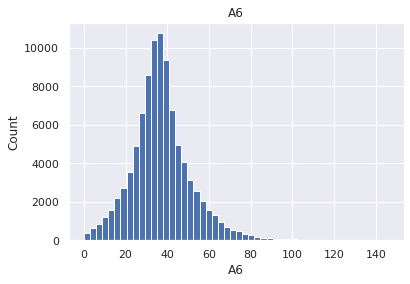

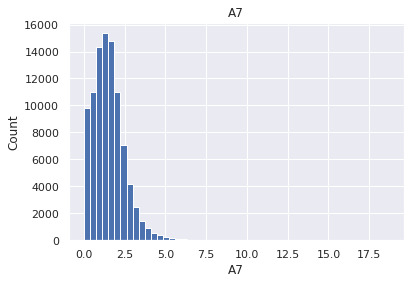

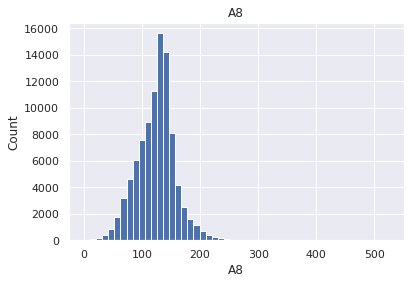

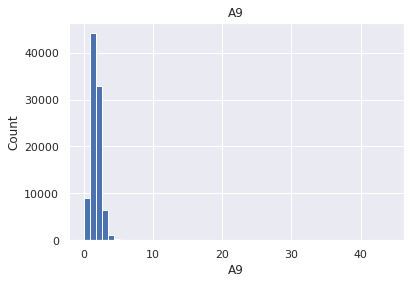

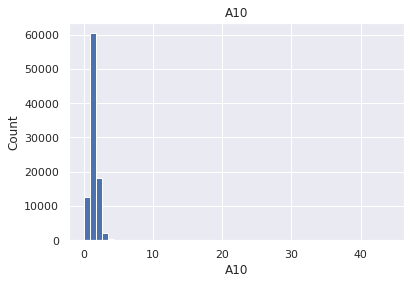

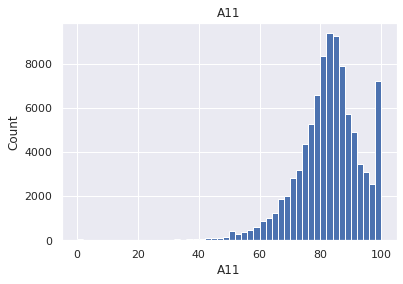

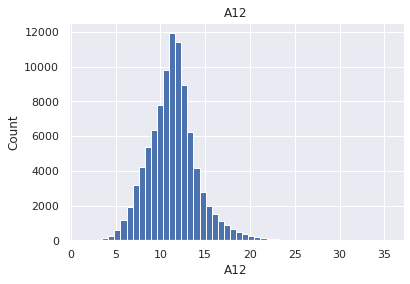

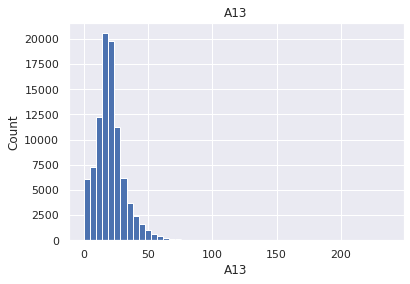

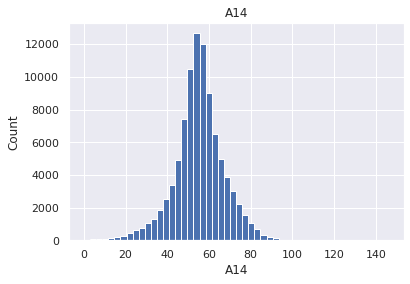

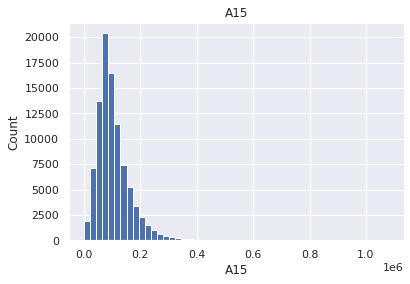

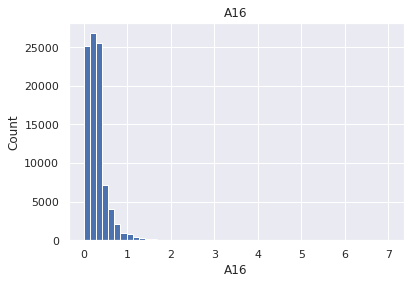

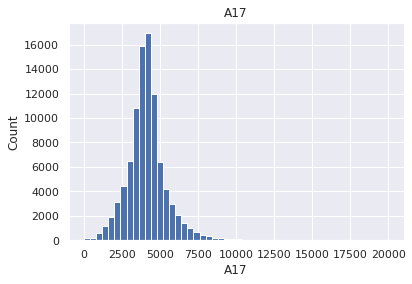

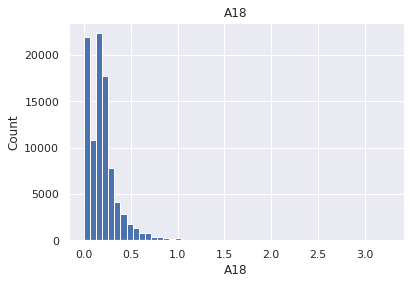

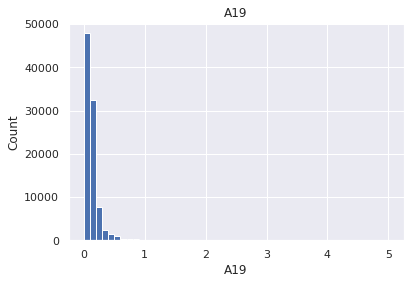

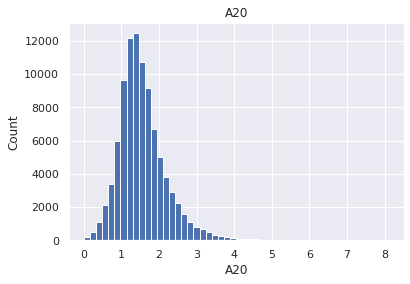

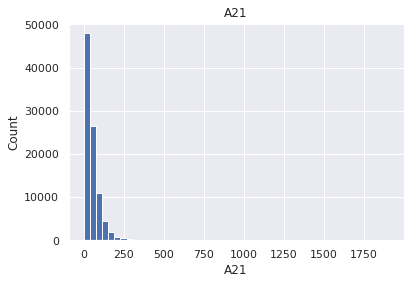

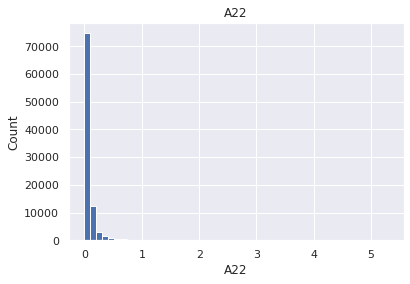

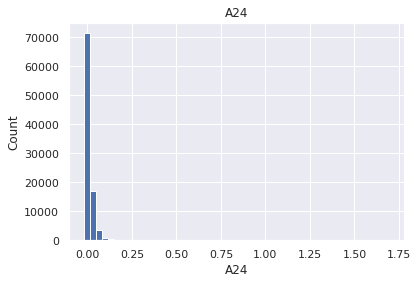

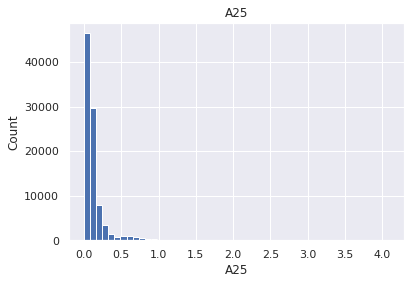

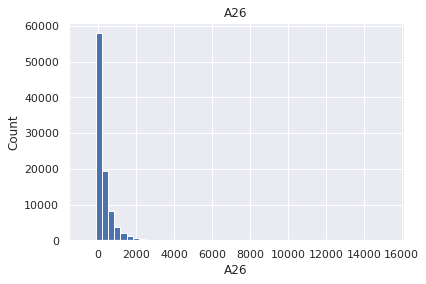

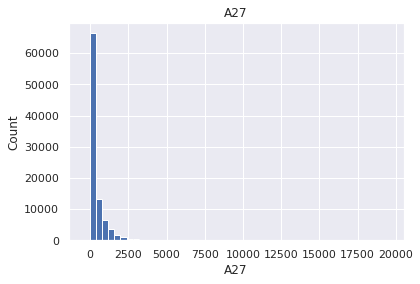

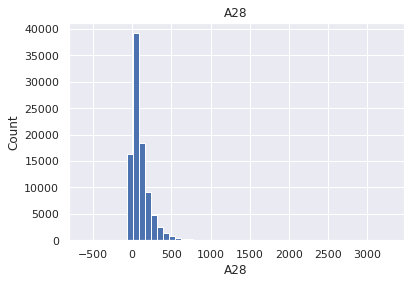

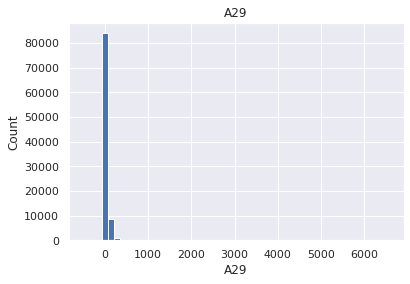

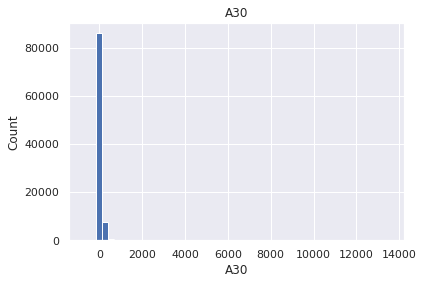

In [ ]:
#Plotting features as histograms to check for distributions
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=50)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

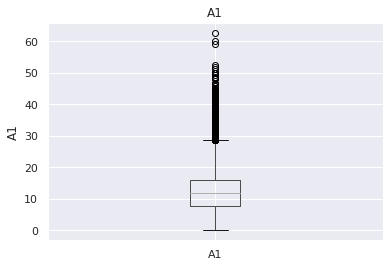

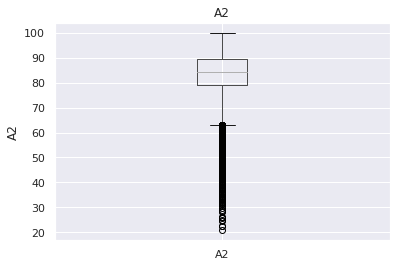

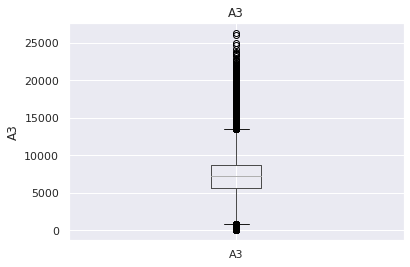

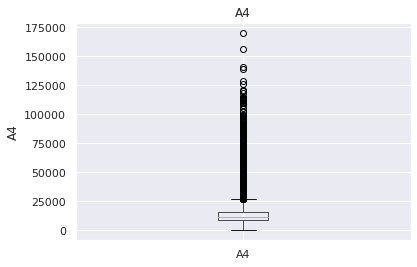

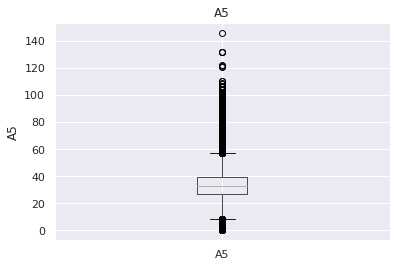

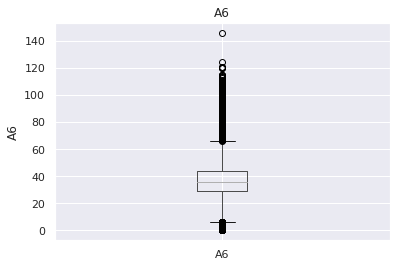

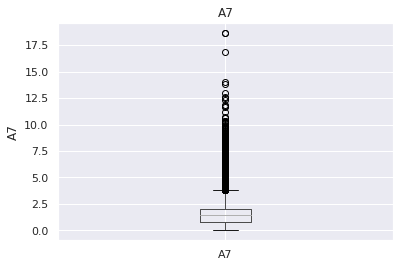

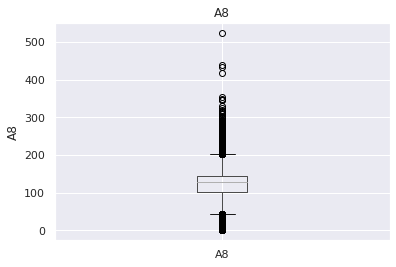

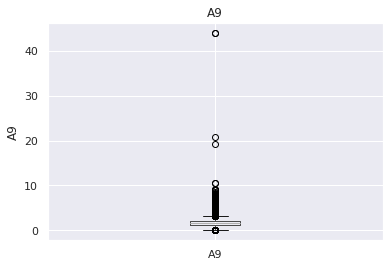

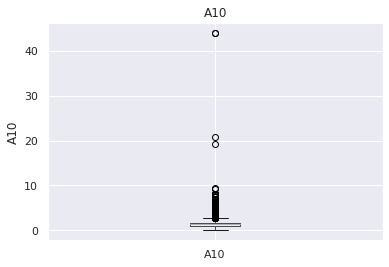

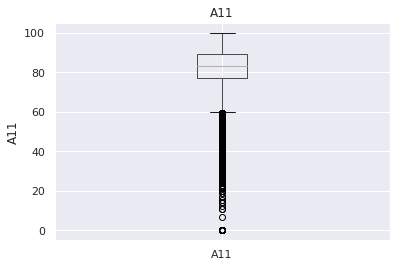

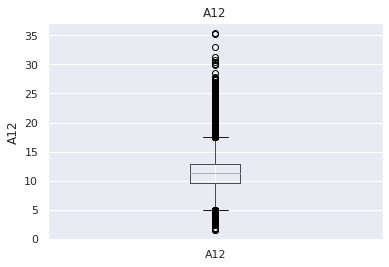

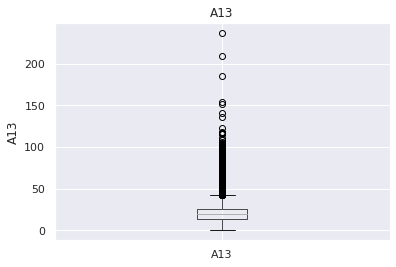

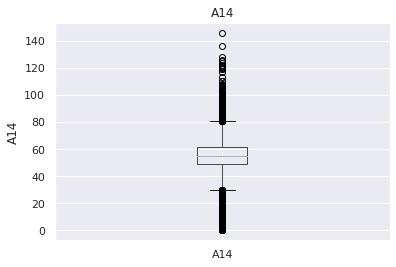

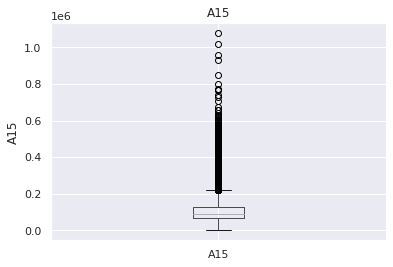

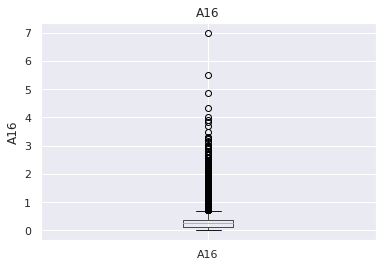

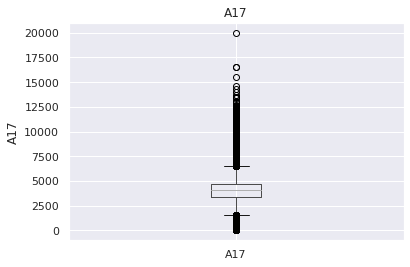

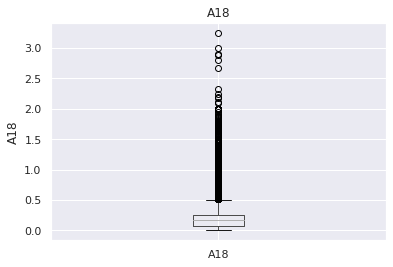

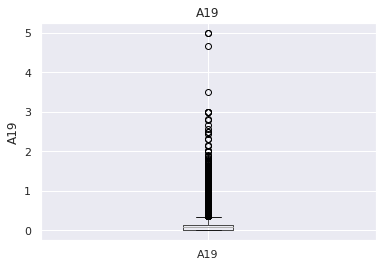

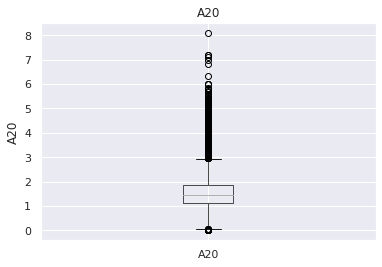

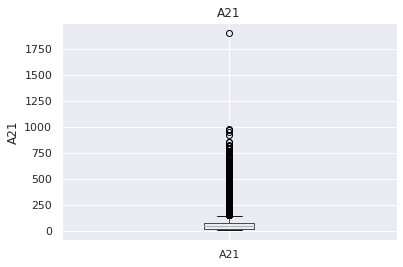

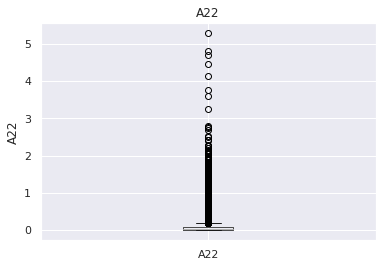

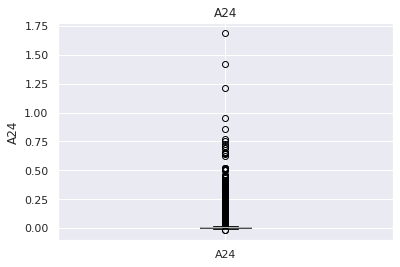

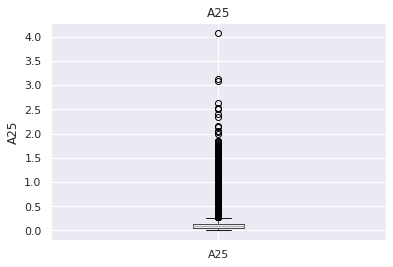

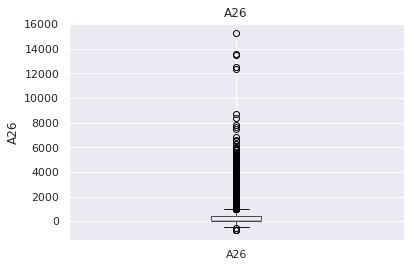

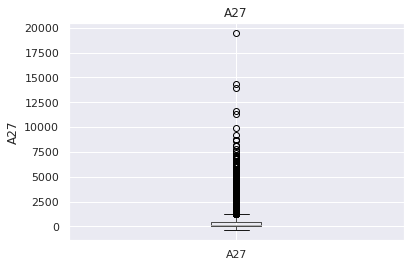

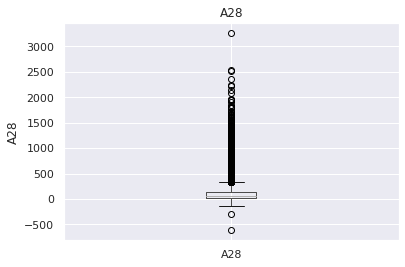

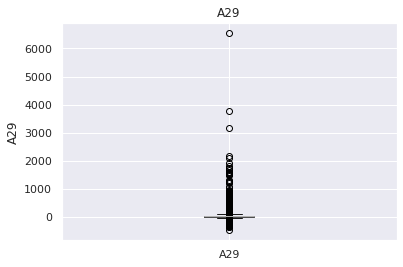

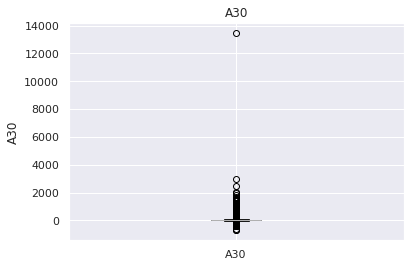

In [ ]:
#Box plots to visualise quartiles and find outliers
for feature in continuous_feature:
    data=dataset.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [ ]:
#Removing the outliers present in the data
df = train.copy()
df.drop(df.index[df['A1'] > 55], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93997 entries, 0 to 93999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A1       93997 non-null  float64
 1   A2       93997 non-null  float64
 2   A3       93997 non-null  float64
 3   A4       93997 non-null  float64
 4   A5       93997 non-null  float64
 5   A6       93997 non-null  float64
 6   A7       93997 non-null  float64
 7   A8       93997 non-null  float64
 8   A9       93997 non-null  float64
 9   A10      93997 non-null  float64
 10  A11      93997 non-null  float64
 11  A12      93997 non-null  float64
 12  A13      93997 non-null  float64
 13  A14      93997 non-null  float64
 14  A15      93997 non-null  float64
 15  A16      93997 non-null  float64
 16  A17      93997 non-null  float64
 17  A18      93997 non-null  float64
 18  A19      93997 non-null  float64
 19  A20      93997 non-null  float64
 20  A21      93997 non-null  int64  
 21  A22      939

In [ ]:
#Class is not balanced, describes the imbalance ratio
train['default'].value_counts()/train.shape[0]

0    0.957447
1    0.042553
Name: default, dtype: float64

# **Feature Engineering**

In [ ]:
# Checking for constant columns - Since none existed according to set threshold, no columns were dropped
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.2)
var_thres.fit(X)
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
#Checking the correlation of different features present
X = train.iloc[:,:]
corr_matrix = X.corr().abs()
corr_matrix

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
A1,1.000000,0.748951,0.471054,0.378873,0.492054,0.483082,0.526474,0.373436,0.331232,0.295327,0.484337,0.372810,0.398576,0.397312,0.303691,0.503393,0.278716,0.456614,0.385320,0.286464,0.009520,0.041449,0.005592,0.042981,0.039630,0.052968,0.036289,0.007522,0.018154,0.034801,0.224554
A2,0.748951,1.000000,0.517863,0.407799,0.482518,0.482486,0.618724,0.375246,0.410535,0.380494,0.770950,0.381769,0.395979,0.394871,0.377217,0.381696,0.292379,0.350420,0.298464,0.229001,0.003766,0.060587,0.019050,0.064202,0.038414,0.056671,0.030326,0.016198,0.022400,0.034842,0.214566
A3,0.471054,0.517863,1.000000,0.665712,0.515764,0.568834,0.445058,0.547352,0.526460,0.487397,0.419552,0.465938,0.445843,0.382244,0.541844,0.280378,0.363778,0.254478,0.235661,0.337238,0.006657,0.068615,0.022535,0.067817,0.012097,0.079143,0.032491,0.028643,0.029465,0.044163,0.173111
A4,0.378873,0.407799,0.665712,1.000000,0.315091,0.412735,0.379968,0.369470,0.493178,0.390337,0.318121,0.338775,0.343314,0.269608,0.583112,0.217860,0.337408,0.199547,0.185777,0.207659,0.042018,0.085139,0.039447,0.078386,0.024151,0.044232,0.052939,0.003614,0.013625,0.031632,0.123059
A5,0.492054,0.482518,0.515764,0.315091,1.000000,0.903871,0.391876,0.434256,0.294310,0.285118,0.372822,0.396888,0.704559,0.681524,0.185134,0.267639,0.254142,0.234799,0.221141,0.364923,0.006974,0.029200,0.009370,0.028006,0.020678,0.060580,0.037347,0.011727,0.009589,0.030253,0.180650
A6,0.483082,0.482486,0.568834,0.412735,0.903871,1.000000,0.401520,0.451374,0.335913,0.307062,0.370367,0.409220,0.599355,0.641190,0.231465,0.273023,0.261100,0.241083,0.223022,0.374750,0.010556,0.036536,0.004372,0.034941,0.020218,0.061436,0.041389,0.010940,0.008679,0.031773,0.178333
A7,0.526474,0.618724,0.445058,0.379968,0.391876,0.401520,1.000000,0.298279,0.344282,0.308982,0.481260,0.302859,0.341161,0.332789,0.363371,0.470803,0.249220,0.422848,0.371383,0.250110,0.037808,0.076212,0.031466,0.073371,0.028496,0.029096,0.048421,0.007466,0.001576,0.022805,0.166574
A8,0.373436,0.375246,0.547352,0.369470,0.434256,0.451374,0.298279,1.000000,0.287236,0.244410,0.301637,0.843509,0.343502,0.462648,0.115539,0.199455,0.229474,0.173153,0.173277,0.552098,0.004991,0.001955,0.024085,0.005212,0.007704,0.070861,0.009729,0.044007,0.037701,0.042242,0.150192
A9,0.331232,0.410535,0.526460,0.493178,0.294310,0.335913,0.344282,0.287236,1.000000,0.911302,0.335947,0.227930,0.297716,0.112229,0.554400,0.194024,0.299464,0.179986,0.162913,0.134941,0.008593,0.072741,0.039863,0.070636,0.033181,0.047023,0.013711,0.023007,0.029357,0.024106,0.132580
A10,0.295327,0.380494,0.487397,0.390337,0.285118,0.307062,0.308982,0.244410,0.911302,1.000000,0.315684,0.185088,0.270177,0.071449,0.534133,0.174595,0.273145,0.162724,0.146519,0.097198,0.000040,0.067156,0.039082,0.066107,0.050839,0.043492,0.005433,0.024532,0.026497,0.020610,0.125432


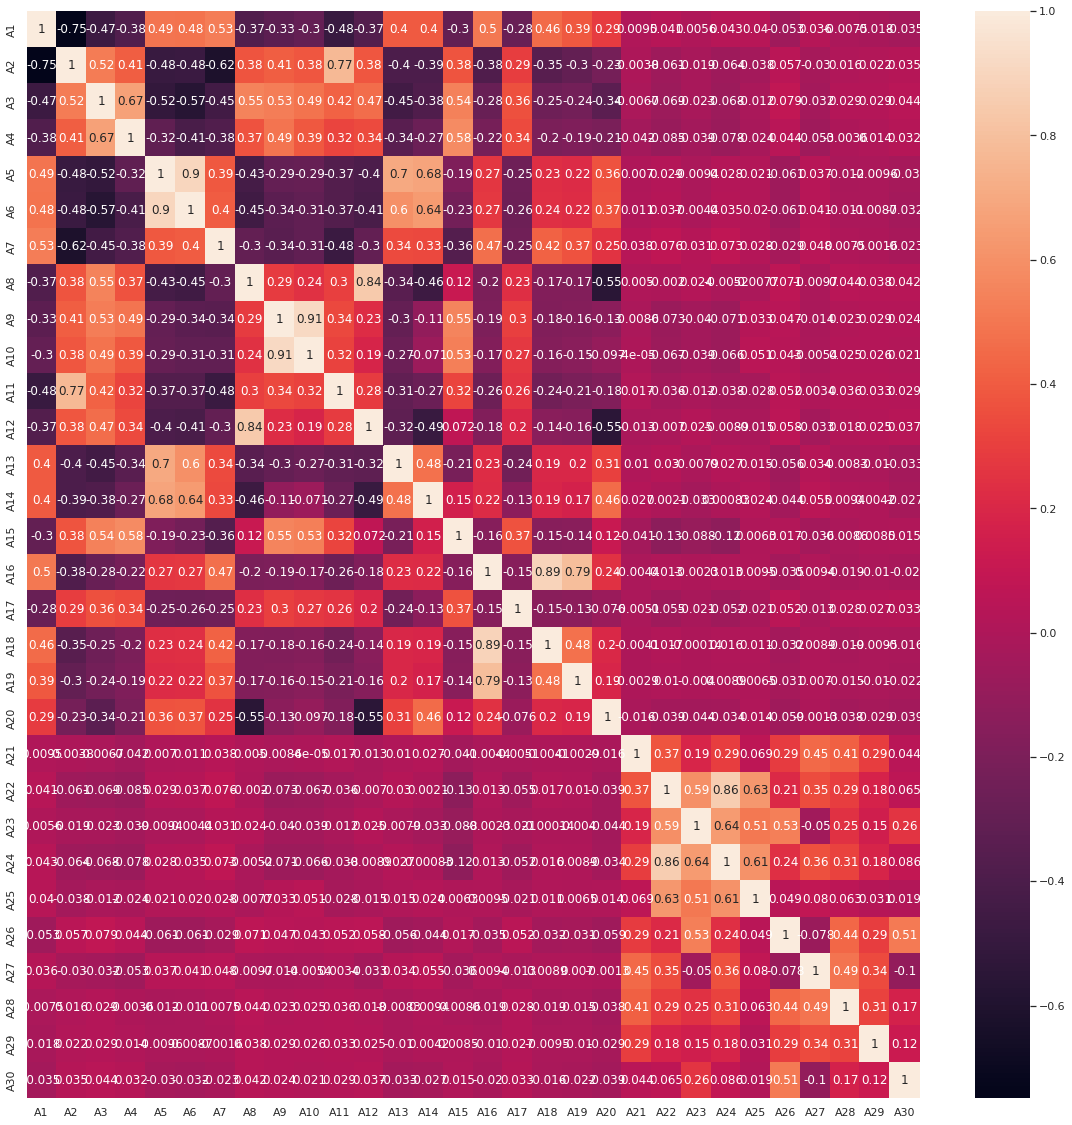

In [ ]:
# Plotting heat-map for the correlation matriz
corr=X.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(X[top_features].corr(),annot=True)

In [ ]:
# Find features with correlation greater than 0.9
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print('Columns to be dropped:',to_drop)

Columns to be dropped: ['A6', 'A10']


In [ ]:
# Drop Features with correlation greater than 0.9
train = train.drop(['A6', 'A10'], axis=1)
val = val.drop(['A6', 'A10'], axis=1)

In [ ]:
# Finding relevant features based on the values of Information gain
from sklearn.feature_selection import SelectKBest
ordered_rank_features=SelectKBest(k=28)
ordered_feature=ordered_rank_features.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [ ]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(train.columns)
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']

In [ ]:
# Ranked the features based on the scores
features_rank.nlargest(28,'Score')

,Features,Score
0,A1,4991.490853
1,A2,4536.403374
4,A5,3171.043651
2,A3,2903.908408
5,A7,2682.580609
8,A11,2451.700776
10,A13,2179.518384
6,A8,2169.313993
13,A16,1817.272934
7,A9,1681.805441


In [ ]:
# Initialising numpy arrays for target variable (y) and independent features (X)
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values
val_X = val.iloc[:, :-1].values
val_y = val.iloc[:, -1].values

In [ ]:
# Feature Importance
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,y)

In [ ]:
# Comparing different features informations gains
C = train.iloc[:,:-1]
mutual_data=pd.Series(mutual_info,index=C.columns)
mutual_data.sort_values(ascending=False)

A1     0.026792
A2     0.021421
A3     0.018758
A4     0.017596
A5     0.017471
A7     0.014014
A8     0.013907
A13    0.013752
A9     0.013720
A11    0.013401
A15    0.013361
A14    0.010753
A17    0.010585
A16    0.009853
A12    0.009647
A19    0.008713
A18    0.008234
A20    0.005591
A22    0.000879
A25    0.000770
A24    0.000768
A21    0.000615
A30    0.000568
A26    0.000425
A23    0.000338
A28    0.000207
A29    0.000129
A27    0.000000
dtype: float64

In [ ]:
new_train = train.drop(['A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30'], axis=1)

In [ ]:
new_train.head()

,A1,A2,A3,A4,A5,A7,A8,A9,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,default
0,10.69,86.10,8920.16,19912.85,30.42,1.18,145.41,2.236,84.29,13.46,16.01,52.18,123101.84,0.23,4305.85,0.15,0.09,1.09,0
1,28.50,65.19,6564.00,6716.67,32.50,2.74,91.11,1.000,59.80,8.18,29.33,63.55,34275.73,0.80,3616.67,0.78,0.14,1.67,0
2,24.87,73.79,4285.47,6463.75,40.50,2.84,93.90,2.400,77.17,10.25,39.92,61.95,84841.79,0.78,2301.54,0.62,0.15,2.80,0
3,13.64,85.82,6887.56,9244.44,49.56,0.36,171.45,1.875,95.88,15.38,49.80,67.22,145261.11,0.09,3419.60,0.09,0.00,1.00,0
4,4.50,95.92,8746.50,19987.50,32.75,0.92,153.25,2.000,94.55,11.87,17.43,50.70,120522.80,0.17,3828.57,0.08,0.00,2.69,0


In [ ]:
new_val = val.drop(['A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30'], axis=1)

In [ ]:
new_val.head()

,A1,A2,A3,A4,A5,A7,A8,A9,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,default
0,22.88,75.59,3367.08,6131.31,41.38,2.13,102.67,0.500,75.85,9.48,22.22,58.46,42131.54,0.65,4005.22,0.33,0.33,1.25,1
1,15.94,86.26,5595.00,10867.86,52.29,3.05,124.94,3.200,75.00,11.72,15.73,63.36,148530.21,0.33,2281.82,0.38,0.00,2.37,1
2,25.16,64.20,4758.44,7818.15,46.28,2.69,110.16,1.124,62.57,10.53,32.24,62.83,39652.58,0.55,3050.54,0.36,0.25,1.51,1
3,19.50,77.81,5762.27,6290.00,58.14,2.44,119.92,1.222,82.50,9.65,48.73,66.29,86341.79,0.50,4169.09,0.31,0.27,2.69,1
4,11.11,85.09,11400.50,20936.25,30.00,0.50,125.89,2.167,95.86,10.35,37.20,63.30,224497.30,0.00,8970.00,0.00,0.00,1.25,1


In [ ]:
'''# Initialising numpy arrays for target variable (y) and independent features (X)
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values
val_X = val.iloc[:, :-1].values
val_y = val.iloc[:, -1].values'''

# **Model Training**

In [ ]:
X = new_train.iloc[:, :-1].values
y = new_train.iloc[:, -1].values
val_X = new_val.iloc[:, :-1].values
val_y = new_val.iloc[:, -1].values

In [ ]:
X.shape

(94000, 18)

In [ ]:
val_X.shape

(11500, 18)

In [ ]:
# Performing standardisation on numerical data columns before logistic regression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
val_X = sc.transform(val_X)

In [ ]:
# Implementing Logistic Regression with class weights
from sklearn.linear_model import LogisticRegression
w = {0:1, 1:4.5}
# define model
lr = LogisticRegression(random_state=13, class_weight=w)
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight={0: 1, 1: 4.5}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=13, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Confusion matrix on Logistic Regression (with Class Weights)
# Giving better results since the output class was imbalanced
from sklearn.metrics import confusion_matrix, accuracy_score
lr_y_pred = lr.predict(val_X)
cm = confusion_matrix(val_y, lr_y_pred)
print(cm)
accuracy_score(val_y, lr_y_pred)

[[9765  235]
 [1062  438]]


0.8872173913043478

In [ ]:
# Tuning the Logistic Regression Model with different parameters
from sklearn.model_selection import RandomizedSearchCV

w = [{0:1.0,1:4.7}, {0:1.0,1:4.6}, {0:1.0,1:4.4}, {0:1.0,1:4.3}, 
     {0:1.0,1:4.8}, {0:1.0,1:4.5},{0:1.0,1:4.2},{0:1.0,1:4}, 
     {0:1.0,1:3}, {0:10,1:2},{0:100,1:1} ]

params = {
    'C': [0.001, 0.01, 0.1, 0.3, 0.7, 1, 2, 4, 7],
    'class_weight': w,
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(0,1000,100)),
    'solver': ['liblinear','lbfgs','newton-cg'],
    'C' : [1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'verbose' : [0,1,2,3,4,5]
}
lr_search = RandomizedSearchCV(estimator = lr, 
                            param_distributions=params, 
                            cv=10,
                            random_state=13, 
                            n_jobs=-1)
lr_search.fit(X, y)

[LibLinear]

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LogisticRegression(C=1.0,
                                                class_weight={0: 1, 1: 4.5},
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=13,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={...
                                                         {0: 1.0, 1: 4.4},
                                                         {0: 1.0, 1: 4.3},
                                

In [ ]:
# Finding best parameters after hypertuning the model
lr_search.best_estimator_

LogisticRegression(C=100, class_weight={0: 1.0, 1: 4.3}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=900, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=13, solver='liblinear', tol=0.0001, verbose=4,
                   warm_start=False)

In [ ]:
# Training the model on tuned parameters
tuned_lr = LogisticRegression(C=100, class_weight={0: 1.0, 1: 4.3}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=900, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=13, solver='liblinear', tol=0.0001, verbose=4,
                   warm_start=False)
tuned_lr.fit(X,y)

[LibLinear]

LogisticRegression(C=100, class_weight={0: 1.0, 1: 4.3}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=900, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=13, solver='liblinear', tol=0.0001, verbose=4,
                   warm_start=False)

In [ ]:
# Calculate the confusion matrix for tuned model
tuned_lr_y_pred = lr_tuned.predict(val_X)
cm = confusion_matrix(val_y, tuned_lr_y_pred)
print(cm)
accuracy_score(val_y, tuned_lr_y_pred)

[[9785  215]
 [1085  415]]


0.8869565217391304

In [ ]:
#Creating final output dataframe
results1 = pd.DataFrame(tuned_lr_y_pred)

In [ ]:
#Storing result column in csv file
results1.to_csv('results1.csv',index=False)

In [ ]:
# Implementing Logistic Regression with class weights
from sklearn.ensemble import RandomForestClassifier
w = {0:1, 1:4.5}
rfc = RandomForestClassifier(n_estimators = 10, class_weight=w, criterion = 'entropy', random_state = 0)
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 4.5}, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [ ]:
# Calculate the confusion matrix for model
rfc_y_pred = rfc.predict(val_X)
cm = confusion_matrix(val_y, rfc_y_pred)
print(cm)
accuracy_score(val_y, rfc_y_pred)

[[9943   57]
 [1451   49]]


0.8688695652173913

In [ ]:
#Tuning Random Forest model
w = [{0:1.0,1:4.7}, {0:1.0,1:4.6}, {0:1.0,1:4.4}, {0:1.0,1:4.3}, 
     {0:1.0,1:4.5},{0:1.0,1:4.2} ]

params = {'bootstrap': [True, False],
          'max_depth': [5, 10, 15, 20, None],
          'class_weight':w,
          'max_features': ['auto', 'sqrt'],
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10],
          'n_estimators': [10,20,100,300]}

r_search = RandomizedSearchCV(estimator = rfc, 
                            param_distributions=params, 
                            random_state=42, 
                            n_iter=5, 
                            cv=10,
                            verbose=3, 
                            n_jobs=-1, 
                            return_train_score=True)
r_search.fit(X, y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.6min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight={0: 1, 1: 4.5},
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
 

In [ ]:
r_search.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight={0: 1.0, 1: 4.3}, criterion='entropy',
                       max_depth=15, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [ ]:
#Re-modelling the random forest model
tuned_rfc = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight={0: 1.0, 1: 4.3}, criterion='entropy',
                       max_depth=15, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)
tuned_rfc.fit(X,y)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight={0: 1.0, 1: 4.3}, criterion='entropy',
                       max_depth=15, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [ ]:
#Confusion matrix for tuned random forest
tuned_rfc_y_pred = tuned_rfc.predict(val_X)
cm = confusion_matrix(val_y, tuned_rfc_y_pred)
print(cm)
accuracy_score(val_y, tuned_rfc_y_pred)

[[9888  112]
 [1259  241]]


0.8807826086956522

In [ ]:
results2 = pd.DataFrame(tuned_rfc_y_pred)

In [ ]:
results2

,0
0,0
1,0
2,0
3,0
4,0
...,...
11495,0
11496,0
11497,0
11498,0


In [ ]:
#Store results into csv file
results2.to_csv('results2.csv',index=False)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
ytrain_pred = tuned_rfc.predict_proba(X)
print('RF train roc-auc: {}'.format(roc_auc_score(y, ytrain_pred[:,1])))
ytest_pred = tuned_rfc.predict_proba(val_X)
print('RF test roc-auc: {}'.format(roc_auc_score(val_y, ytest_pred[:,1])))

RF train roc-auc: 0.9806703833333333
RF test roc-auc: 0.7980811333333332


In [ ]:
ytrain_pred = tuned_lr.predict_proba(X)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y, ytrain_pred[:,1])))
ytest_pred = tuned_lr.predict_proba(val_X)
print('Logistic test roc-auc: {}'.format(roc_auc_score(val_y, ytest_pred[:,1])))

Logistic train roc-auc: 0.8136263541666666
Logistic test roc-auc: 0.8203647333333334


In [ ]:
pred=[]
for model in [tuned_lr,tuned_rfc]:
    pred.append(pd.Series(model.predict_proba(val_X)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(val_y,final_prediction)))

Ensemble test roc-auc: 0.8237111333333333


In [ ]:
pd.concat(pred,axis=1)

,0,1
0,0.418962,0.333775
1,0.121114,0.021107
2,0.517052,0.416302
3,0.300503,0.108525
4,0.023568,0.014966
...,...,...
11495,0.063116,0.003217
11496,0.260498,0.200881
11497,0.328879,0.215672
11498,0.402266,0.186961


In [ ]:
#### Calculate the ROC Curve
fpr, tpr, thresholds = roc_curve(val_y, final_prediction)
thresholds

array([1.87276100e+00, 8.72761001e-01, 8.51920787e-01, ...,
       4.61177535e-03, 4.56126407e-03, 1.02792013e-03])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(val_y, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
327,0.416729,0.887739
326,0.417359,0.887739
325,0.417615,0.887652
324,0.417937,0.887652
322,0.418188,0.887652


In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

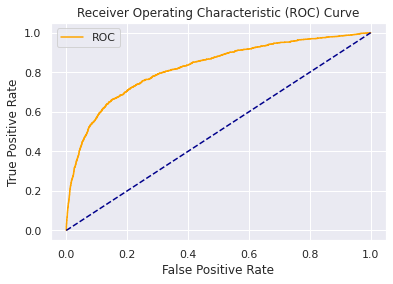

In [ ]:
plot_roc_curve(fpr,tpr)